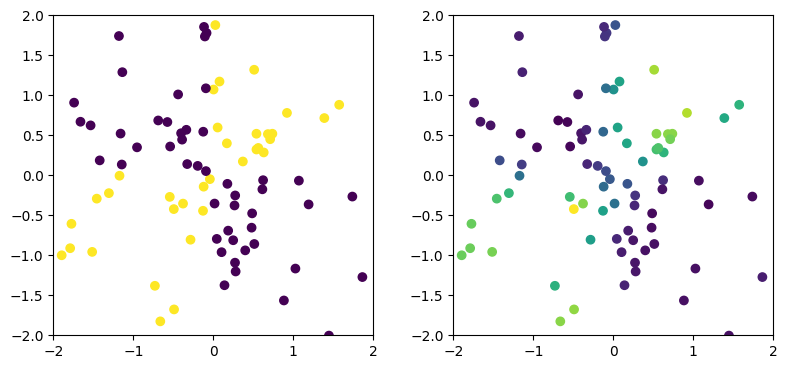

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ThreeLayerPerceptron:
    def __init__(self, N_inputs, N_hidden, N_output):        
        self.W_IH = np.random.randn(N_inputs, N_hidden)
        self.W_HO = np.random.randn(N_hidden, N_output)

        self.b_IH = np.random.randn( N_hidden)
        self.b_HO = np.random.randn( N_output)
    
    def activation(self,F):
        return np.tanh(F)+1
    
    def activation_derivative(self,F):
        return 1 - np.tanh(F)**2
    
    def feedforward(self,X):
        zIH = np.dot(X, self.W_IH) + self.b_IH
        aH = self.activation(zIH)        
        zHO = np.dot(aH, self.W_HO) + self.b_HO
        aO = self.activation(zHO)
        return aH, aO, zIH, zHO

    def cost(self, Y, aO):        
        return 0.5*np.mean((Y - aO)**2)
    
    def cost_derivative_over_activation(self, Y, aO):        
        return ( aO - Y )

    def backpropagation(self, X, Y, aH, aO, zIH, zHO):
        deltaO =  self.cost_derivative_over_activation( Y, aO) * self.cost_derivative_over_activation( zHO, aO)
        deltaW_HO = aH.T * deltaO        
        deltaH = np.dot(deltaO, self.W_HO.T) * self.activation_derivative(zIH)
        deltaW_IH = np.outer(X, deltaH)        
        if deltaW_IH.ndim == 1:
            deltaW_IH = deltaW_IH[:, np.newaxis]
        if deltaW_HO.ndim == 1:
            deltaW_HO = deltaW_HO[:, np.newaxis]        
        return deltaW_IH, deltaW_HO, deltaH, deltaO
    
    def update_weights(self,deltaW_IH, deltaW_HO, lr=0.001):
        self.W_IH -= lr * deltaW_IH
        self.W_HO -= lr * deltaW_HO
        return self.W_IH, self.W_HO

    def update_biases(self, deltaH, deltaO, lr=0.001):
        self.b_IH -= lr * deltaH
        self.b_HO -= lr * deltaO
        return self.b_IH, self.b_HO

    def train(self, X, Y, epochs=100, lr=0.01):
        for _ in range(epochs):                       
            for i in range(np.size(X,0)):  
                aH, aO, zH, zO = self.feedforward(X[i,:])                 
                deltaW_IH, deltaW_HO, deltaH, deltaO = self.backpropagation(X[i,:], Y[i,:], aH, aO, zH, zO) 
                self.update_weights(deltaW_IH, deltaW_HO, lr=0.01)
                self.update_biases(deltaH, deltaO, lr=0.01)     


def main():
    ### model
    model = ThreeLayerPerceptron(2, 5, 1)
    epochs = 5000
    learning_rate = 0.0002
    
    ### data
    N = 90 ### number of samples
    X = np.random.randn(N, 2)        
    Y = np.random.randn(N, 1)
    for i in range(N):
        if X[i,0] > 0 and X[i,1] > 0:
            Y[i,0] = 0.9
        elif X[i,0] < 0 and X[i,1] < 0:
            Y[i,0] = 0.9
        elif X[i,0] > 0 and X[i,1] < 0:
            Y[i,0] = 0.1
        elif X[i,0] < 0 and X[i,1] > 0:
            Y[i,0] = 0.1


    ### training
    model.train(X, Y, epochs=epochs, lr=learning_rate)
    ### inference
    out_store = np.zeros((N, 1))
    for i in range(np.size(X,0)):
        aH, aO, zH, zO = model.feedforward(X[i,:])
        out_store[i] = aO        
    

    ### plot
    fig = plt.figure(figsize=(8, 8))
    ax1=fig.add_axes([0.01,0.01,0.4,0.4])
    ax2=fig.add_axes([0.51,0.01,0.4,0.4])
    
    ax1.scatter(X[:,0], X[:,1], c=np.abs(Y), cmap="viridis")
    ax1.set_xlim([-2,2])
    ax1.set_ylim ([-2,2])

    ax2.scatter(X[:,0], X[:,1], c=np.abs(out_store), cmap="viridis")
    ax2.set_xlim([-2,2])
    ax2.set_ylim ([-2,2])



## ## main
if __name__ == "__main__":
    main()    
 

In [87]:
565 + 433  + 919 

1917

In [2]:
import numpy as np

def activation(F):
    return np.tanh(F)

a = np.random.randn(10)
sigma_prime =np.gradient( activation(a) , a) 
print(np.size(sigma_prime))



10


1848